# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [4]:
sinasc_raw['munResLat'].min()

-13.49976

In [5]:
sinasc_raw['munResLat'].max()

-8.76889

In [6]:
intervalos = pd.cut(sinasc_raw['munResLat'], [-13.5, -10.5, -8.7])
agrupamento = sinasc_raw.groupby(intervalos)[['SEMAGESTAC', 'CONSPRENAT']]
agrupamento.aggregate([
    ('soma', 'sum'), 
    ('média', 'mean'), 
    ('mínimo', 'min'), 
    ('máximo', 'max'), 
    ('mediana', 'median'), 
    ('desvio', 'std'), 
    ('variância', 'var')
])

SEMAGESTAC                                             \
                     soma      média mínimo máximo mediana    desvio   
munResLat                                                              
(-13.5, -10.5]   482665.0  38.545360   19.0   45.0    39.0  2.012435   
(-10.5, -8.7]    511951.0  38.588302   21.0   45.0    39.0  2.020722   

                         CONSPRENAT                                            \
               variância       soma     média mínimo máximo mediana    desvio   
munResLat                                                                       
(-13.5, -10.5]  4.049895   110072.0  8.591321    0.0   99.0     8.0  4.243102   
(-10.5, -8.7]   4.083319   105365.0  7.931125    0.0   99.0     8.0  5.863665   

                           
                variância  
munResLat                  
(-13.5, -10.5]  18.003915  
(-10.5, -8.7]   34.382564

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [7]:
sinasc_raw['munResArea'].min()

459.978

In [8]:
sinasc_raw['munResArea'].max()

34096.394

In [9]:
faixas_area = pd.cut(sinasc_raw['munResArea'], [459, 3000, 34100])
aggr_area = sinasc_raw.groupby(faixas_area)[['APGAR1', 'APGAR5']]
aggr_area.aggregate([
    ('soma', 'sum'), 
    ('média', 'mean'), 
    ('mínimo', 'min'), 
    ('máximo', 'max'), 
    ('mediana', 'median'), 
    ('desvio', 'std'), 
    ('variância', 'var')
])

APGAR1                                                      \
                   soma     média mínimo máximo mediana    desvio variância   
munResArea                                                                    
(459, 3000]     42070.0  8.073306    0.0   10.0     8.0  1.008790  1.017658   
(3000, 34100]  177079.0  8.152808    0.0   10.0     8.0  0.978517  0.957495   

                 APGAR5                                                      
                   soma     média mínimo máximo mediana    desvio variância  
munResArea                                                                   
(459, 3000]     47560.0  9.130351    0.0   10.0     9.0  0.801124  0.641799  
(3000, 34100]  199579.0  9.190836    0.0   10.0     9.0  0.787591  0.620299

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [10]:
sinasc_raw['munResAlt'].min()

85.0

In [11]:
sinasc_raw['munResAlt'].max()

595.0

In [12]:
faixas_alt = pd.qcut(sinasc_raw['munResAlt'], 5)
aggr_alt = sinasc_raw.groupby(faixas_alt)[['QTDFILVIVO', 'QTDFILMORT']]
aggr_alt.aggregate([
    ('soma', 'sum'), 
    ('média', 'mean'), 
    ('mínimo', 'min'), 
    ('máximo', 'max'), 
    ('mediana', 'median'), 
    ('desvio', 'std'), 
    ('variância', 'var')
])

QTDFILVIVO                                                      \
                     soma     média mínimo máximo mediana    desvio variância   
munResAlt                                                                       
(84.999, 87.0]     8976.0  1.177798    0.0   12.0     1.0  1.236798  1.529670   
(87.0, 139.0]      3556.0  1.161332    0.0   11.0     1.0  1.312407  1.722412   
(139.0, 161.0]     4331.0  1.052491    0.0   14.0     1.0  1.176940  1.385188   
(161.0, 227.0]     5353.0  0.908366    0.0    9.0     1.0  1.005460  1.010950   
(227.0, 595.0]     4610.0  0.967877    0.0   30.0     1.0  1.122494  1.259993   

               QTDFILMORT                                                      
                     soma     média mínimo máximo mediana    desvio variância  
munResAlt                                                                      
(84.999, 87.0]     2282.0  0.309550    0.0    9.0     0.0  0.642375  0.412645  
(87.0, 139.0]       804.0  0.263953    0.0    7.0     0.0  0.600433  0.360520  
(139.0, 161.0]     1020.0  0.261673    0.0    9.0     0.0  0.600037  0.360045  
(161.0, 227.0]     1413.0  0.241044    0.0    5.0     0.0  0.545241  0.297288  
(227.0, 595.0]     1124.0  0.236582    0.0   28.0     0.0  0.663021  0.439596

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [13]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Ariquemes": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

In [14]:
sinasc_raw['munResRegiao'] = sinasc_raw['munResNome'].map(imediatas)
sinasc_raw = sinasc_raw.dropna(subset=['munResRegiao'])
sinasc_raw.isna()['munResRegiao'].value_counts()

False    27027
Name: munResRegiao, dtype: int64

In [15]:
agr_imediatas = sinasc_raw.groupby(['munResRegiao', 'DTNASC'])
serie_agrupada = agr_imediatas['IDADEMAE'].mean()
serie_agrupada

munResRegiao  DTNASC    
Ariquemes     2019-01-01    23.200000
              2019-01-02    26.166667
              2019-01-03    24.142857
              2019-01-04    24.666667
              2019-01-05    22.888889
                              ...    
Vilhena       2019-12-27    27.000000
              2019-12-28    22.666667
              2019-12-29    24.250000
              2019-12-30    26.600000
              2019-12-31    23.857143
Name: IDADEMAE, Length: 2181, dtype: float64

In [16]:
regioes = sinasc_raw['munResRegiao'].unique()
regioes

array(['Cacoal', 'Ariquemes', 'Jaru', 'Porto Velho', 'Ji-Paraná',
       'Vilhena'], dtype=object)

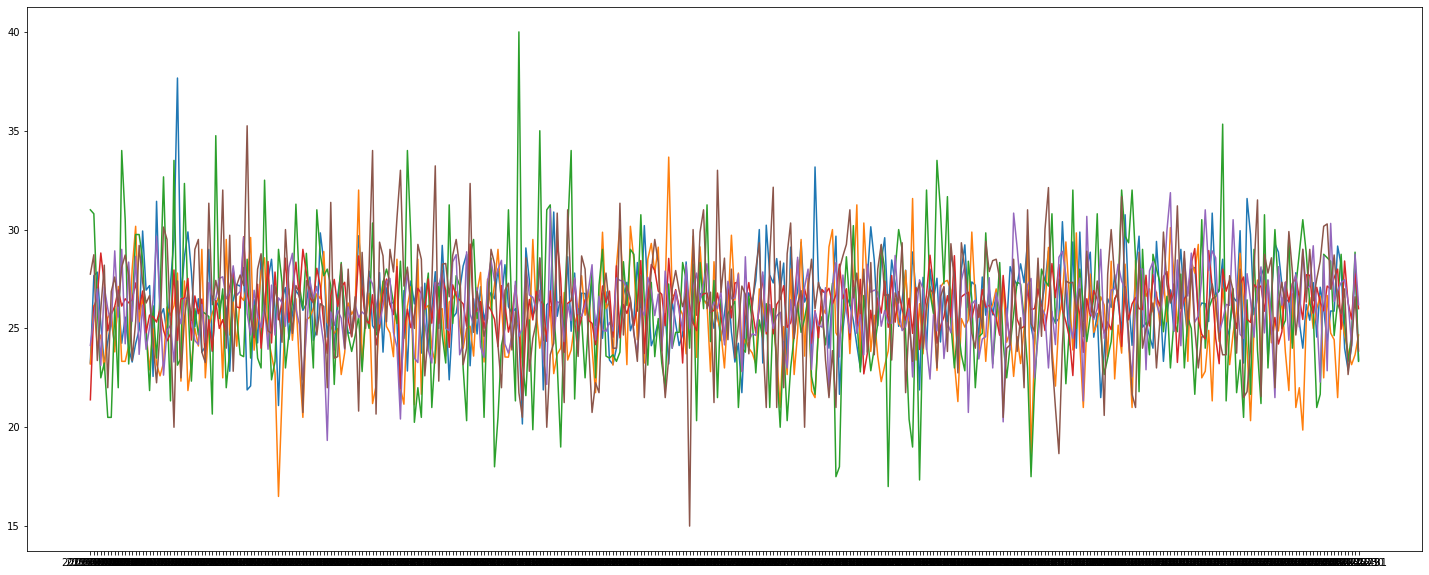

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 10)
for reg in regioes:
    ax.plot(serie_agrupada[reg].index, serie_agrupada[reg])

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.